# **1-Sentimental analysis on the Elon-musk tweets**

In [ ]:
# Importing the libraries

!pip install nltk

import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
import string

import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# importing the dataset

kindle=pd.read_csv("/content/preprocessed_kindle_review .csv",encoding="latin",error_bad_lines=False)
kindle.head()

<ipython-input-16-2cc03b352bba>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kindle=pd.read_csv("/content/preprocessed_kindle_review .csv",encoding="latin",error_bad_lines=False)


,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:

kindle=kindle["summary"]
kindle

0                                        50 + years ago...
1                                  Boring! Boring! Boring!
2                          Wiggleliscious/new toy ready/!!
3                                          Very good read.
4                                             Great Story!
                               ...                        
11995                                    Where's the meat?
11996                                          Interesting
11997    Dragon Knights, Wings of Change (I Dream of Dr...
11998                            Good writing, short story
11999                       interesting public domain book
Name: summary, Length: 12000, dtype: object

In [ ]:
 # remove both the leading and the trailing characters
kindle=[i.strip() for i in kindle] # remove both the leading and the trailing
kindle[:10]

['50 + years ago...',
 'Boring! Boring! Boring!',
 'Wiggleliscious/new toy ready/!!',
 'Very good read.',
 'Great Story!',
 'When an Alien Scientist Gets Lost in the Oregon Wilderness And a Human Scientist Finds Her, Love Is Their Discovery',
 'Hot Civil War Read... I wanted more Romance',
 'Wow and wonderful read with a twist',
 'Steadily getting better!',
 'Childish writing']

In [ ]:
#Joining the list into one string

review=" ".join(kindle)
review

'50 + years ago... Boring! Boring! Boring! Wiggleliscious/new toy ready/!! Very good read. Great Story! When an Alien Scientist Gets Lost in the Oregon Wilderness And a Human Scientist Finds Her, Love Is Their Discovery Hot Civil War Read... I wanted more Romance Wow and wonderful read with a twist Steadily getting better! Childish writing Kiss... Kiss... Kiss :) I\'m being kind with 1 star Great Paper but would like a lower price II Liked It Lousy Read unimaginative all heroes should be like this man An okay read The Greeks baby bargain. 4 1/2 STARS for Toe Popper !! This mystery/thriller had me gasping at times !! Such a neglected subject! Sammi Ever After Great Read Skillful writing, packs a punch. But... Good...but ;) Another great book! 4.5 blue ribbons from Romance Junkies Hot and Confused? Love these guys ... The greatest story ever! Good Western Disgusting premise Hotter than HOT! Coachella Valley Traffic Jam good enough for me... Great short story A SWEET STORY OF THE UGLY DUC

In [ ]:
#Removing all the Punctuations fromt the joined Text

no_punc=review.translate(str.maketrans(" "," ",string.punctuation))
no_punc

'50  years ago Boring Boring Boring Wigglelisciousnew toy ready Very good read Great Story When an Alien Scientist Gets Lost in the Oregon Wilderness And a Human Scientist Finds Her Love Is Their Discovery Hot Civil War Read I wanted more Romance Wow and wonderful read with a twist Steadily getting better Childish writing Kiss Kiss Kiss  Im being kind with 1 star Great Paper but would like a lower price II Liked It Lousy Read unimaginative all heroes should be like this man An okay read The Greeks baby bargain 4 12 STARS for Toe Popper  This mysterythriller had me gasping at times  Such a neglected subject Sammi Ever After Great Read Skillful writing packs a punch But Goodbut  Another great book 45 blue ribbons from Romance Junkies Hot and Confused Love these guys  The greatest story ever Good Western Disgusting premise Hotter than HOT Coachella Valley Traffic Jam good enough for me Great short story A SWEET STORY OF THE UGLY DUCKLING MEETS THE BEAST A QUICK READ A DANCE IN THE DARK BY

In [ ]:
# Tokenizing into word after removing the punctions from the data

from nltk.tokenize import word_tokenize

word=nltk.word_tokenize(no_punc)
word

In [ ]:
# Adding  string to tokenized data

reviews=" ".join(word)
reviews

'50 years ago Boring Boring Boring Wigglelisciousnew toy ready Very good read Great Story When an Alien Scientist Gets Lost in the Oregon Wilderness And a Human Scientist Finds Her Love Is Their Discovery Hot Civil War Read I wanted more Romance Wow and wonderful read with a twist Steadily getting better Childish writing Kiss Kiss Kiss Im being kind with 1 star Great Paper but would like a lower price II Liked It Lousy Read unimaginative all heroes should be like this man An okay read The Greeks baby bargain 4 12 STARS for Toe Popper This mysterythriller had me gasping at times Such a neglected subject Sammi Ever After Great Read Skillful writing packs a punch But Goodbut Another great book 45 blue ribbons from Romance Junkies Hot and Confused Love these guys The greatest story ever Good Western Disgusting premise Hotter than HOT Coachella Valley Traffic Jam good enough for me Great short story A SWEET STORY OF THE UGLY DUCKLING MEETS THE BEAST A QUICK READ A DANCE IN THE DARK BY KAREN

In [ ]:
# Cheking the leghth of reviews

len(reviews)

6989654

In [ ]:
# Remove Stopwords

from nltk.corpus import stopwords

stop_words=stopwords.words("english")

stop=[i for i in word if not i in stop_words]
stop[0:10]


['50',
 'years',
 'ago',
 'Boring',
 'Boring',
 'Boring',
 'Wigglelisciousnew',
 'toy',
 'ready',
 'Very']

In [ ]:
# Normalize the data, converting the entire data to lower case

lower=[i.lower() for i in stop]
lower[0:10]


['50',
 'years',
 'ago',
 'boring',
 'boring',
 'boring',
 'wigglelisciousnew',
 'toy',
 'ready',
 'very']

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [ ]:
stem=[ps.stem(i) for i in lower]
stem[0:10]

['50',
 'year',
 'ago',
 'bore',
 'bore',
 'bore',
 'wigglelisciousnew',
 'toy',
 'readi',
 'veri']

**Lemmatizing**

In [ ]:
lemma=nltk.WordNetLemmatizer()

lem=[lemma.lemmatize(i) for i in lower]
lem[0:10]

['50',
 'year',
 'ago',
 'boring',
 'boring',
 'boring',
 'wigglelisciousnew',
 'toy',
 'ready',
 'very']

In [ ]:
# Adding lemmatized content to string
lemmmas=" ".join(lem)

**Generating Word Cloud out of lemmatized words**

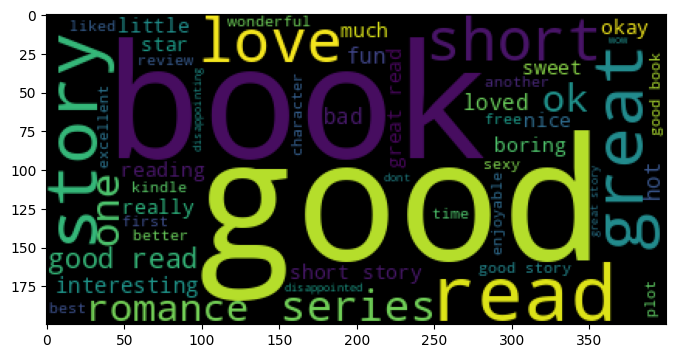

In [ ]:
import matplotlib.pyplot as plt

stop=STOPWORDS

wc=WordCloud(background_color="black",stopwords=stop,max_words=50).generate(lemmmas)
plt.figure(figsize=(8,7))
plt.imshow(wc)


# **Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

**Using CountVectorizer**

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(lem)

In [ ]:
cv_voc=pd.DataFrame([cv.vocabulary_]).T # Below we can see the words reapeated for how many times, .T will show the output in Table format
cv_voc

,0
50,61
year,5454
ago,176
boring,606
wigglelisciousnew,5338
...,...
155,14
certain,783
enchant,1547
awakened,388


In [ ]:
# Extracitng th feature of cv

x_cv=pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x_cv

,00,000,05,10,100,1001,103,1115,12,120,...,zealous,zero,zipped,zlovely,zombie,zone,zoned,zsadist,zylan,zzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36072,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Building with TfidfVectorize

tf=TfidfVectorizer()

y=tf.fit_transform(lem)
y_tf=pd.DataFrame(y.toarray(),columns=tf.get_feature_names_out())
y_tf

,00,000,05,10,100,1001,103,1115,12,120,...,zealous,zero,zipped,zlovely,zombie,zone,zoned,zsadist,zylan,zzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Suming the words

sum_words=x.sum(axis=0)
sum_words

matrix([[ 1,  1,  2, ..., 10,  1,  1]])

# **Named Entity Recognition (NER)**

In [ ]:
# Importing library for  NER

import spacy
from spacy import displacy

In [ ]:
nlp=spacy.load("en_core_web_sm") #to display graphical representation for tags

In [ ]:
doc=nlp(lemmmas[:1000])
displacy.render(doc,style="ent",jupyter=True)

# **2- Emotion Mining**

In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
kindl1=pd.read_csv("/content/preprocessed_kindle_review .csv",encoding="latin",error_bad_lines=False)
kindl1.head()

<ipython-input-7-ca9c4a8876ef>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  kindl1=pd.read_csv("/content/preprocessed_kindle_review .csv",encoding="latin",error_bad_lines=False)


,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!


In [ ]:
kindl1=kindl1["summary"]
kindl1

0                                        50 + years ago...
1                                  Boring! Boring! Boring!
2                          Wiggleliscious/new toy ready/!!
3                                          Very good read.
4                                             Great Story!
                               ...                        
11995                                    Where's the meat?
11996                                          Interesting
11997    Dragon Knights, Wings of Change (I Dream of Dr...
11998                            Good writing, short story
11999                       interesting public domain book
Name: summary, Length: 12000, dtype: object

In [ ]:
kindle1 = [i.strip() for i in kindl1] # remove both the leading and the trailing characters
kindle1 = [x for x in kindl1 if x] # removes empty strings, because they are considered in Python as False

In [ ]:
# Filtering the nouns and verbs only

noun_verb=[i.text for i in doc if i.pos_ in ("NOUNS","VERB")]
noun_verb

['boring',
 'lost',
 'find',
 'read',
 'wanted',
 'getting',
 'm',
 'like',
 'liked',
 'read',
 'gasping',
 'neglected',
 'read',
 'goodbut',
 'duckling',
 'read',
 'traveling',
 'leave']

In [ ]:
len(noun_verb)

18

In [ ]:
# Creating the data frame

df=pd.DataFrame({"word":cv.get_feature_names_out(),
                 "count":np.array(sum_words).flatten()})
df

,word,count
0,00,1
1,000,1
2,05,2
3,10,10
4,100,3
...,...,...
5498,zone,1
5499,zoned,1
5500,zsadist,10
5501,zylan,1


In [ ]:
# Importing the affin data set

affin=pd.read_csv("/content/Afinn.csv",encoding="latin",error_bad_lines=False)
affin

<ipython-input-57-714e5fe7e75e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  affin=pd.read_csv("/content/Afinn.csv",encoding="latin",error_bad_lines=False)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
# Sentence tokenization

sentences =nltk.sent_tokenize(" ".join(kindl1))
sentences

In [ ]:
sent_df=pd.DataFrame(sentences,columns=["sentences"])
sent_df

,sentences
0,50 + years ago... Boring!
1,Boring!
2,Boring!
3,Wiggleliscious/new toy ready/!!
4,Very good read.
...,...
3201,Awakened Desires Too much for me Good Read Gre...
3202,Where's the book the other reviewers read???
3203,It's good but not my favorite So-so an expensi...
3204,All of It One of the original Masters of Horro...


In [ ]:
score= affin.set_index('word')['value'].to_dict()
score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=score

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# Manuall testing if it works
calculate_sentiment("no so good")


2

In [ ]:
sent_df["sentiment_value"]=sent_df["sentences"].apply(calculate_sentiment)
sent_df



,sentences,sentiment_value
0,50 + years ago... Boring!,-3
1,Boring!,-3
2,Boring!,-3
3,Wiggleliscious/new toy ready/!!,0
4,Very good read.,3
...,...,...
3201,Awakened Desires Too much for me Good Read Gre...,-1
3202,Where's the book the other reviewers read???,0
3203,It's good but not my favorite So-so an expensi...,5
3204,All of It One of the original Masters of Horro...,0


In [ ]:
sent_df.sort_values(by="sentiment_value")
sent_df.tail(10)

,sentences,sentiment_value
3196,Good read!,3
3197,"breakfast, lunch and dinner?",0
3198,Could've been great... good newspaper Fantastic!,6
3199,horrible!!!,-3
3200,Can't beleive people gave this a high rating S...,3
3201,Awakened Desires Too much for me Good Read Gre...,-1
3202,Where's the book the other reviewers read???,0
3203,It's good but not my favorite So-so an expensi...,5
3204,All of It One of the original Masters of Horro...,0
3205,"Interesting Dragon Knights, Wings of Change (I...",7


In [ ]:
sent_df.head(10)

,sentences,sentiment_value
0,50 + years ago... Boring!,-3
1,Boring!,-3
2,Boring!,-3
3,Wiggleliscious/new toy ready/!!,0
4,Very good read.,3
5,Great Story!,0
6,When an Alien Scientist Gets Lost in the Orego...,0
7,I wanted more Romance Wow and wonderful read w...,11
8,Childish writing Kiss...,-2
9,Kiss...,2


In [ ]:
# Checking the sentiment score for whole review

sent_df["sentiment_value"].describe()

count    3206.000000
mean        2.450094
std         3.897017
min       -11.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        33.000000
Name: sentiment_value, dtype: float64

By above analysis we can see the 50% of review is 2 rating

In [ ]:
# Checking which review has more than 10 ratings
sent_df[sent_df["sentiment_value"]>10]

,sentences,sentiment_value
7,I wanted more Romance Wow and wonderful read w...,11
10,Kiss :) I'm being kind with 1 star Great Paper...,12
43,Good Read So-So Destined to be a classic Simpl...,12
48,Interesting idea - descends into blood and gut...,13
63,Mysterious Island Captivating Needs an editor ...,12
...,...,...
3078,Solid mystery Great Western by one of the grea...,12
3081,"Interesting Read.. Not great, but fun Great sh...",12
3093,unless you like crude sex (zero stars) Carnal ...,16
3095,Pretty good book carly hoping for more Immatur...,11


In [ ]:
sent_df[sent_df["sentiment_value"]<5]

,sentences,sentiment_value
0,50 + years ago... Boring!,-3
1,Boring!,-3
2,Boring!,-3
3,Wiggleliscious/new toy ready/!!,0
4,Very good read.,3
...,...,...
3199,horrible!!!,-3
3200,Can't beleive people gave this a high rating S...,3
3201,Awakened Desires Too much for me Good Read Gre...,-1
3202,Where's the book the other reviewers read???,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

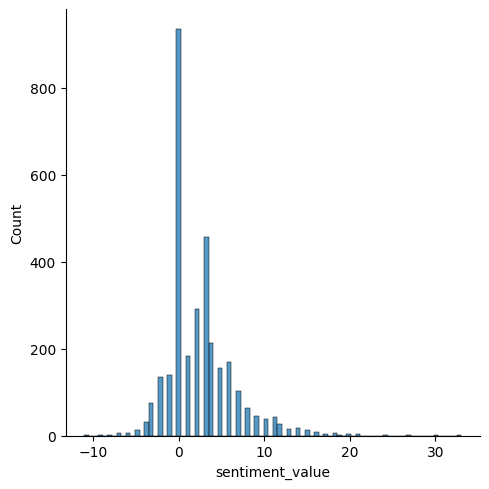

In [ ]:
# Plotting the distribution plot on sentiment values

sns.displot(sent_df["sentiment_value"])
plt.show()

In [ ]:
# importing PW for positive words

pw=pd.read_csv("/content/positive-words.txt",encoding="latin",error_bad_lines=False)
pw

<ipython-input-119-fb79e45a0297>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pw=pd.read_csv("/content/positive-words.txt",encoding="latin",error_bad_lines=False)
Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;
...,...
2026,youthful
2027,zeal
2028,zenith
2029,zest


In [ ]:
# Renaming the column of positive words


pw=pw.rename(columns={";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;":"words"})
pw["score"]=1
pw

,words,score
0,;,1
1,; Opinion Lexicon: Positive,1
2,;,1
3,; This file contains a list of POSITIVE opinio...,1
4,;,1
...,...,...
2026,youthful,1
2027,zeal,1
2028,zenith,1
2029,zest,1


In [ ]:
# Importing negative words as nw


nw=pd.read_csv("/content/negative-words.txt",encoding="latin",error_bad_lines=False)
nw

<ipython-input-140-090dadbe867f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  nw=pd.read_csv("/content/negative-words.txt",encoding="latin",error_bad_lines=False)
Skipping line 10: expected 1 fields, saw 2
Skipping line 14: expected 1 fields, saw 5
Skipping line 15: expected 1 fields, saw 3
Skipping line 16: expected 1 fields, saw 2
Skipping line 18: expected 1 fields, saw 3
Skipping line 19: expected 1 fields, saw 3
Skipping line 27: expected 1 fields, saw 3
Skipping line 28: expected 1 fields, saw 2



,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
...,...
4803,zaps
4804,zealot
4805,zealous
4806,zealously


In [ ]:
# Renaming the Nw colums

nw=nw.rename(columns={";;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;":"words"},)
nw["score"]=-1
nw

,words,score
0,;,-1
1,; Opinion Lexicon: Negative,-1
2,;,-1
3,; This file contains a list of NEGATIVE opinio...,-1
4,;,-1
...,...,...
4803,zaps,-1
4804,zealot,-1
4805,zealous,-1
4806,zealously,-1


In [ ]:
# Fetcging setiments and adding it to the score column

score1=pw.set_index("words")["score"].to_dict()
score2=pw.set_index("words")["score"].to_dict()
score1.update(score2)
score=score1
score

{'; ': 1,
 '; Opinion Lexicon: Positive': 1,
 ';': 1,
 '; This file contains a list of POSITIVE opinion words (or sentiment words).': 1,
 '; This file and the papers can all be downloaded from ': 1,
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html': 1,
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ': 1,
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ': 1,
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ': 1,
 '; Notes: ': 1,
 ';    1. The appearance of an opinion word in a sentence does not necessarily  ': 1,
 ';       mean that the sentence expresses a positive or negative opinion. ': 1,
 ';       See the paper below:': 1,
 ';       Bing Liu. "Sentiment Analysis and Subjectivity." An chapter in ': 1,
 ';    2. You will notice many misspelled words in the list. They are not ': 1,
 ';       mistakes. They are included as these misspelled words appear ': 1,
 ';       frequently in social media 

In [ ]:
# Function definition for sentence score

nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=score

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# Adding sentiment_values column by apply.calculating

sent_df["sentiment_value"]=sent_df["sentences"].apply(calculate_sentiment)
sent_df

,sentences,sentiment_value
0,50 + years ago... Boring!,0
1,Boring!,0
2,Boring!,0
3,Wiggleliscious/new toy ready/!!,0
4,Very good read.,1
...,...,...
3201,Awakened Desires Too much for me Good Read Gre...,0
3202,Where's the book the other reviewers read???,0
3203,It's good but not my favorite So-so an expensi...,2
3204,All of It One of the original Masters of Horro...,0


In [ ]:
sent_df["sentiment_value"].describe()

count    3206.000000
mean        1.521522
std         1.755048
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: sentiment_value, dtype: float64

# **From above result we can see that 75 per cent of the reviews are rated at 2 rating.**